# Google Play Store Analysis

This project aims to explore key trends in the mobile app industry by analyzing three critical questions. First, we investigate which app genre tends to receive the highest ratings, providing insights into user preferences. Secondly, we examine whether there is a significant difference in the number of downloads between free and paid apps, shedding light on consumer behavior in terms of cost. Lastly, we identify the category with the highest number of applications, revealing where developers are most concentrated and possibly where the competition is fiercest.

**We want to start the analysis with questions and then answer them through images.**

* Which genre tends to get a higher rating?
* Is there a substantial difference between the amount of downloads of free apps and paid apps?
* Which category has the highest number of applications?

## Import library

In [1]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

## load Dataset

In [2]:
goolgleApps = pd.read_csv("/kaggle/input/google-playstore-app/googleplaystore(edited).csv")

Dataset description:

**App**: (Application name) 

**Category**: (Category the app belongs to)

**Rating**: (Overall user rating of the app)

**Reviews**: (Number of user reviews for the app) 

**Size**: (Size of the app)

**Installs**: (Number of user downloads/installs for the app)

**Type**: (Paid or Free)

**Price**: (Price of the app)

**Content Rating**: (Age group the app is targeted at - Children / Mature 21+ / Adult) 

**Genres**: (An app can belong to multiple genres)

**Last Updated**: (Date when the app was last updated on Play Store)

**Current Ver**: (Current version of the app available on Play Store)

**Android Ver**: (Min required Android version)


## Cleaning Dataset

In [3]:
# check the dimensions of the dataset
goolgleApps.shape

(10841, 13)

In [4]:
# check the first 5 rows of the dataset
goolgleApps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
# show the columns of the new dataset and we skipped a row so it doesnt treat the header as a row
DataSet = pd.read_csv("/kaggle/input/google-playstore-app/googleplaystore(edited).csv", names=['App', 'Category', 'Rating', 'Reviews', 'Size',
                                                        'Installs', 'Type', 'Price', 'Content Rating', 'Genres',
                                                        'Last Updated', 'Current Ver', 'Android Ver'],
                          skiprows=1,low_memory=False, index_col=0)

In [6]:
# Print a summary of the DataFrame
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10840 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  int64  
 3   Size            10841 non-null  object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10841 non-null  object 
 8   Genres          10840 non-null  object 
 9   Last Updated    10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.1+ MB


In [7]:
# Check the number of null values in the columns
DataSet.isnull().sum()


Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [8]:
# Inspect the nulls in the Android Version column
(DataSet[DataSet['Android Ver'].isnull()])
DataSet.rename(columns={'Android Ver':'Android_Ver'}, inplace=True)


In [9]:
# Check the value counts for Android Version column
DataSet['Android_Ver'].value_counts()

Android_Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1376
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [10]:
# Drop the shifted record
DataSet = DataSet[~((DataSet.Category == '1.9'))]
DataSet = DataSet[~((DataSet['Android_Ver'].isnull()))]
DataSet = DataSet[~((DataSet.Android_Ver == 'Varies with device'))]
DataSet.shape

(9477, 12)

In [11]:
# Check the value counts for Android Version column
print(DataSet['Android_Ver'].value_counts())

Android_Ver
4.1 and up       2451
4.0.3 and up     1501
4.0 and up       1376
4.4 and up        980
2.3 and up        652
5.0 and up        601
4.2 and up        394
2.3.3 and up      281
2.2 and up        244
4.3 and up        243
3.0 and up        241
2.1 and up        134
1.6 and up        116
6.0 and up         60
7.0 and up         42
3.2 and up         36
2.0 and up         32
5.1 and up         24
1.5 and up         20
4.4W and up        12
3.1 and up         10
2.0.1 and up        7
8.0 and up          6
7.1 and up          3
5.0 - 8.0           2
4.0.3 - 7.1.1       2
1.0 and up          2
7.0 - 7.1.1         1
4.1 - 7.1.1         1
5.0 - 6.0           1
2.2 - 7.1.1         1
5.0 - 7.1.1         1
Name: count, dtype: int64


In [12]:
# Check the dataframe again for null values to cross-verify
print(DataSet.shape)
print(DataSet.isnull().sum())

(9477, 12)
Category             1
Rating            1431
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android_Ver          0
dtype: int64


In [13]:
# Check the records where the current version is null
print(DataSet[DataSet['Current Ver'].isnull()])

                                            Category  Rating  Reviews  Size  \
App                                                                           
Learn To Draw Kawaii Characters       ART_AND_DESIGN     3.2       55  2.7M   
Market Update Helper              LIBRARIES_AND_DEMO     4.1    20145   11k   
Virtual DJ Sound Mixer                         TOOLS     4.2     4010  8.7M   
BT Master                                     FAMILY     NaN        0  222k   
Dots puzzle                                   FAMILY     4.0      179   14M   
Calculate My IQ                               FAMILY     NaN       44  7.2M   
UFO-CQ                                         TOOLS     NaN        1  237k   
La Fe de Jesus                   BOOKS_AND_REFERENCE     NaN        8  658k   

                                   Installs  Type   Price Content Rating  \
App                                                                        
Learn To Draw Kawaii Characters      5,000+  Free       0

In [14]:
# Check the value counts for Current Version column
print(DataSet['Current Ver'].value_counts())
DataSet.rename(columns={'Current Ver':'Current_Ver'}, inplace=True)
DataSet = DataSet[~((DataSet['Current_Ver'].isnull()))]
DataSet = DataSet[~((DataSet.Current_Ver == 'Varies with device'))]

Current Ver
1                     840
1.1                   275
1.2                   185
Varies with device    169
2                     165
                     ... 
7.16.8                  1
5.1.0 free              1
04.08.00                1
2.10.06                 1
2.0.148.0               1
Name: count, Length: 2755, dtype: int64


In [15]:
# Check the value counts for Current Version column again
print(DataSet['Current_Ver'].value_counts())

Current_Ver
1             840
1.1           275
1.2           185
2             165
1.3           145
             ... 
7.16.8          1
5.1.0 free      1
04.08.00        1
18.0.2          1
2.0.148.0       1
Name: count, Length: 2754, dtype: int64


In [16]:
# Drop the records with null in rating
DataSet.dropna(subset=['Rating'],inplace=True)

In [17]:
# Check the dataframe again for null values to cross-verify
print(DataSet.isnull().sum())


Category          1
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64


In [18]:
# Checking Price column
print(DataSet.Price.value_counts())

Price
0           7298
$0.99        104
$2.99        102
$4.99         60
$1.99         54
            ... 
$1.29          1
$299.99        1
$379.99        1
$37.99         1
$1.20          1
Name: count, Length: 69, dtype: int64


In [19]:
# Check that all non-zero values in Price column starts with '$'
print(DataSet.Price.shape[0] == DataSet.Price.str.startswith('$').sum() + DataSet.Price[DataSet.Price == '0'].count())

True


In [20]:
# Get rid of '$' and change the type to float64
DataSet.Price = DataSet.Price.apply(lambda x: float(x.replace('$', '')))

In [21]:
# check the data type for the price column
print(DataSet.Price.dtype)

float64


In [22]:
# Check Reviews column
print(DataSet.Reviews.value_counts())

Reviews
2         83
3         78
5         74
4         72
1         67
          ..
6762       1
120373     1
40225      1
18294      1
1195       1
Name: count, Length: 4791, dtype: int64


In [23]:
# Convert the 'Reviews' column to strings
DataSet['Reviews'] = DataSet['Reviews'].astype(str)

# Now check if all values are digits
all_digits = DataSet['Reviews'].str.isdigit().sum() == DataSet['Reviews'].shape[0]

In [24]:
# Change the dtype of Reveiws column to be int64
DataSet.Reviews = DataSet.Reviews.astype('int64')

In [25]:
# check the data type for the Reviews column
print(DataSet.Reviews.dtype)

int64


In [26]:
# Check Installs column
print(DataSet.Installs.value_counts())

Installs
1,000,000+        1322
100,000+          1056
10,000+            975
10,000,000+        862
1,000+             692
5,000,000+         547
500,000+           488
50,000+            436
5,000+             420
100+               303
100,000,000+       220
500+               198
50,000,000+        177
10+                 69
50+                 55
500,000,000+        35
1,000,000,000+      10
5+                   9
1+                   3
Name: count, dtype: int64


In [27]:
# Get rid of ',' & '+' and change the type to int64
DataSet.Installs = DataSet.Installs.apply(lambda x: int(x.replace(',', '').replace('+', '')))

In [28]:
# check the data type for the Install column
print(DataSet.Installs.dtype)


int64


In [29]:
# Check Size column
print(DataSet.Size.value_counts())

Size
Varies with device    239
14M                   164
12M                   155
11M                   155
13M                   154
                     ... 
454k                    1
812k                    1
442k                    1
842k                    1
619k                    1
Name: count, Length: 412, dtype: int64


In [30]:
# Define function to fix size - convert all values to KB
def fix_size(x):
    if x[-1] == 'M':
        x = float(x[:-1]) * 10 ** 3
    elif x[-1] == 'k':
        x = float(x[:-1])
    else:
        x = None  # Varies with device replaced with Null
    return x

In [31]:
# Fix Size column
DataSet.Size = DataSet.Size.apply(lambda x: fix_size(x))
print(DataSet.Size.dtype)


float64


In [32]:
# Print a summary of the DataFrame
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7877 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Fr. Mike Schmitz Audio Teachings
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        7876 non-null   object 
 1   Rating          7877 non-null   float64
 2   Reviews         7877 non-null   int64  
 3   Size            7638 non-null   float64
 4   Installs        7877 non-null   int64  
 5   Type            7877 non-null   object 
 6   Price           7877 non-null   float64
 7   Content Rating  7877 non-null   object 
 8   Genres          7876 non-null   object 
 9   Last Updated    7877 non-null   object 
 10  Current_Ver     7877 non-null   object 
 11  Android_Ver     7877 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [33]:
# check the shape
print(DataSet.shape)

(7877, 12)


In [34]:
# remove duplicates rows
DataSet.drop_duplicates(subset=None, inplace=True)
print(DataSet.shape)

(7560, 12)


In [35]:
# convert floats
def fix_floats(data):
    if isinstance(data,list):
        iterator = enumerate(data)
    elif isinstance(data,dict):
        iterator = data.items()
    else:
        raise TypeError("can only traverse list or dict")

    for i,value in iterator:
        if isinstance(value,(list,dict)):
            fix_floats(value)
        elif isinstance(value,str):
            try:
                data[i] = float(value)
            except ValueError:
                pass


## Visualization and Answer to the Question

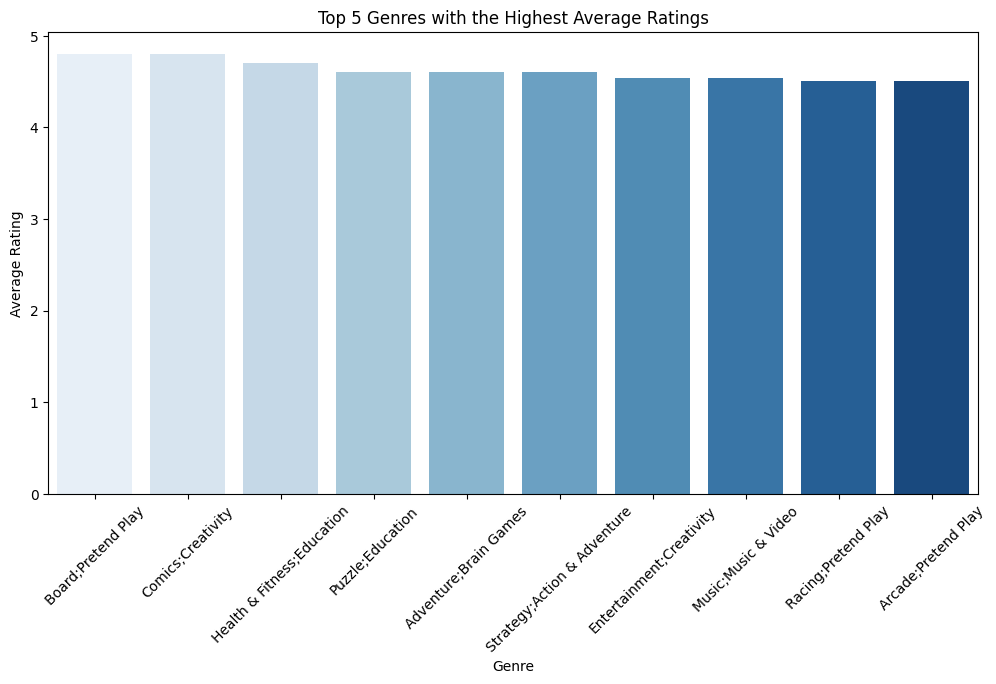

In [36]:

# Calculate the average rating for each genre
genre_rating_mean = DataSet.groupby('Genres')['Rating'].mean()

# Sort genres by average rating in descending order and get the top 5
top_10_genres = genre_rating_mean.sort_values(ascending=False).head(10)


# Create a bar plot for the top 5 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='Blues')

plt.title('Top 5 Genres with the Highest Average Ratings')
plt.xlabel('Genre')
plt.ylabel('Average Rating')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


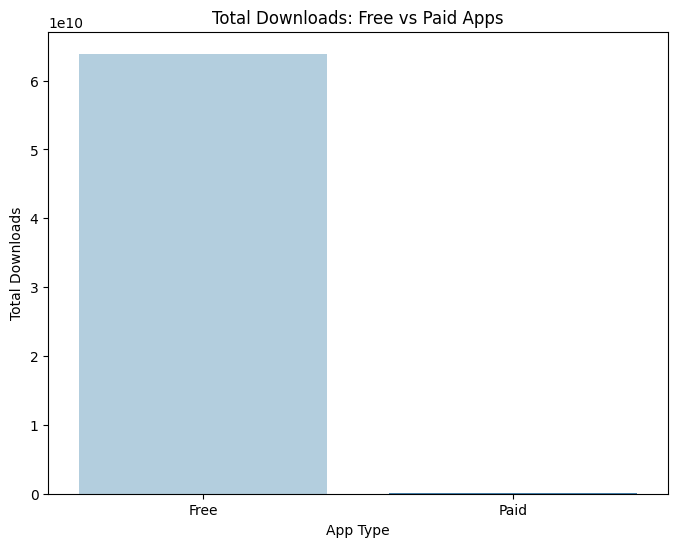

In [37]:

# Assuming 'DataSet' has 'Type' (free/paid) and 'Downloads' columns

# Calculate the total number of downloads for free and paid apps
downloads_by_type = DataSet.groupby('Type')['Installs'].sum()

# Create a bar plot to compare the number of downloads
plt.figure(figsize=(8, 6))
sns.barplot(x=downloads_by_type.index, y=downloads_by_type.values, palette='Blues')

plt.title('Total Downloads: Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Total Downloads')

plt.show()


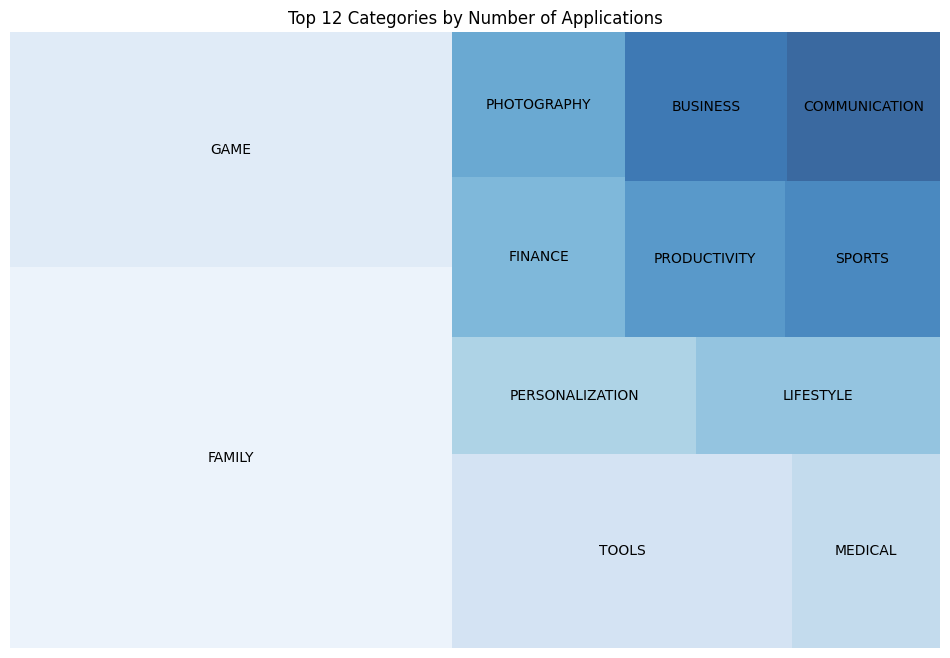

In [38]:

# Assuming 'DataSet' has a 'Category' column

# Calculate the number of applications for each category
category_counts = DataSet['Category'].value_counts()

# Select the top 12 categories
top_12_categories = category_counts.head(12)

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Category': top_12_categories.index,
    'Count': top_12_categories.values
})

# Plot the tree map
plt.figure(figsize=(12, 8))
squarify.plot(sizes=df['Count'], label=df['Category'], alpha=.8, color=sns.color_palette('Blues', len(df)))

plt.title('Top 12 Categories by Number of Applications')
plt.axis('off')  # Hide the axes for a cleaner look
plt.show()
